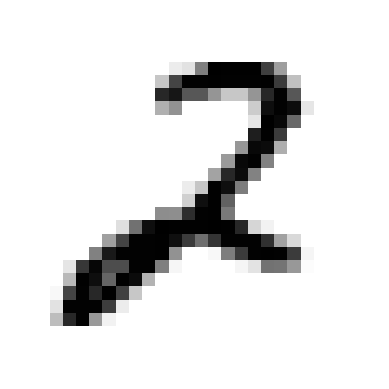

Prediction for the example digit: [ True]
Mean cross-validation accuracy: 0.9787


In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
x, y = mnist['data'], mnist['target']

some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

clf = LogisticRegression(tol=0.1, max_iter=1000)
clf.fit(x_train, y_train_2)

example = clf.predict([some_digit])
print(f"Prediction for the example digit: {example}")

a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(f"Mean cross-validation accuracy: {a.mean():.4f}")

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score after training on existing dataset", score)

Accuracy score after training on existing dataset 0.9705
